<a href="https://colab.research.google.com/github/vothanhcong03/ThanhCong/blob/main/Robot_Vacum%2C_Washing_Machine%2CClassify_Mango.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

4.000000000000001


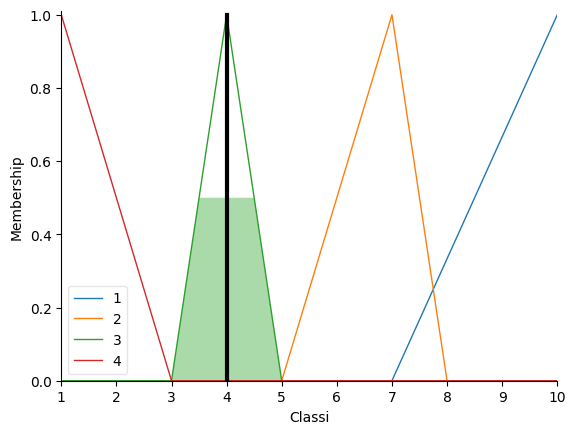

In [16]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Định nghĩa input
size = ctrl.Antecedent(np.arange(0, 1001, 1), 'size')
defect = ctrl.Antecedent(np.arange(0, 8, 1), 'defect')
density = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'density')
# Định nghĩa output

Classi = ctrl.Consequent(np.arange(1,11, 1), 'Classi')

sweetness = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'sweetness')
#INPUT
# Khối lượng xoài
size['I'] = fuzz.trimf(size.universe, [900, 1000, 1000])
size['II'] = fuzz.trimf(size.universe, [700, 900, 900])
size['III'] = fuzz.trimf(size.universe, [400, 700, 700])
size['IV'] = fuzz.trimf(size.universe, [0, 400, 400])

defect['good'] = fuzz.trimf(defect.universe, [0.5, 1, 1])
defect['medium'] = fuzz.trimf(defect.universe, [1, 3, 5])
defect['poor'] = fuzz.trimf(defect.universe, [5, 7, 7])

density['sour'] = fuzz.trimf(density.universe, [0, 0, 0.9])
density['sweet'] = fuzz.trimf(density.universe, [0.9, 1, 1])

#OUTPUT
Classi['1'] = fuzz.trimf(Classi.universe, [7, 10, 10])
Classi['2'] = fuzz.trimf(Classi.universe, [5, 7, 7])
Classi['3'] = fuzz.trimf(Classi.universe, [3, 4, 5])
Classi['4'] = fuzz.trimf(Classi.universe, [1, 1, 3])

# Điều khiển các quy tắc

rule1 = ctrl.Rule(size['I'] & defect['good'] & density["sweet"], Classi['1'])
rule2 = ctrl.Rule(size['I'] & defect['medium'] & density["sweet"], Classi['2'])
rule3 = ctrl.Rule(size['I'] & defect['poor'] & density["sweet"], Classi['3'])

rule4 = ctrl.Rule(size['I'] & defect['good'] & density["sour"], Classi['2'])
rule5 = ctrl.Rule(size['I'] & defect['medium'] & density["sour"], Classi['3'])
rule6 = ctrl.Rule(size['I'] & defect['poor'] & density["sour"], Classi['4'])

rule7 = ctrl.Rule(size['II'] & defect['good'] & density["sweet"], Classi['2'])
rule8 = ctrl.Rule(size['II'] & defect['medium'] & density["sweet"], Classi['3'])
rule9 = ctrl.Rule(size['II'] & defect['poor'] & density["sweet"], Classi['4'])

rule10 = ctrl.Rule(size['II'] & defect['good'] & density["sour"], Classi['3'])
rule11= ctrl.Rule(size['II'] & defect['medium'] & density["sour"], Classi['4'])
rule12= ctrl.Rule(size['II'] & defect['poor'] & density["sour"], Classi['4'])

rule13= ctrl.Rule(size['III'] & defect['good'] & density["sweet"], Classi['3'])
rule14= ctrl.Rule(size['III'] & defect['medium'] & density["sweet"],Classi['4'])
rule15= ctrl.Rule(size['III'] & defect['poor'] & density["sweet"], Classi['4'])

rule16= ctrl.Rule(size['III'] & defect['good'] & density["sour"], Classi['4'])
rule17= ctrl.Rule(size['III'] & defect['medium'] & density["sour"], Classi['4'])
rule18= ctrl.Rule(size['III'] & defect['poor'] & density["sour"], Classi['4'])

rule19= ctrl.Rule(size['IV'] & defect['good'] & density["sweet"], Classi['4'])
rule20= ctrl.Rule(size['IV'] & defect['medium'] & density["sweet"], Classi['4'])
rule21= ctrl.Rule(size['IV'] & defect['poor'] & density["sweet"], Classi['4'])

rule22= ctrl.Rule(size['IV'] & defect['good'] & density["sour"], Classi['4'])
rule23= ctrl.Rule(size['IV'] & defect['medium'] & density["sour"], Classi['4'])
rule24= ctrl.Rule(size['IV'] & defect['poor'] & density["sour"], Classi['4'])

#

#
Classi_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,
                                  rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23
                                  ,rule24])
Classi_sim = ctrl.ControlSystemSimulation(Classi_ctrl)


# Thiết lập giá trị input
Classi_sim.input['size'] = 950
Classi_sim.input['defect'] = 7
Classi_sim.input['density'] = 1

# Tính toán kết quả
Classi_sim.compute()



# In kết quả
print(Classi_sim.output['Classi'])
Classi.view(Classi_sim)

In [3]:
"""import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Định nghĩa các biến đầu vào và đầu ra
left_dist = ctrl.Antecedent(np.arange(0, 200, 1), 'left_dist')
right_dist = ctrl.Antecedent(np.arange(0, 200, 1), 'right_dist')
front_dist = ctrl.Antecedent(np.arange(0, 200, 1), 'front_dist')
left_speed = ctrl.Consequent(np.arange(-101, 101, 1), 'left_speed')
right_speed = ctrl.Consequent(np.arange(-101, 101, 1), 'right_speed')

# Định nghĩa các hàm mức độ (membership functions) cho các biến đầu vào và đầu ra
#Trái
left_dist['close'] = fuzz.trimf(left_dist.universe, [0, 0, 100])
left_dist['medium'] = fuzz.trimf(left_dist.universe, [0, 100, 200])
left_dist['far'] = fuzz.trimf(left_dist.universe, [100, 100, 200])
#Phải
right_dist['close'] = fuzz.trimf(right_dist.universe, [0, 0, 100])
right_dist['medium'] = fuzz.trimf(right_dist.universe, [0, 100, 200])
right_dist['far'] = fuzz.trimf(right_dist.universe, [100, 100, 200])
#Trước
front_dist['close'] = fuzz.trimf(front_dist.universe, [0, 0, 100])
front_dist['medium'] = fuzz.trimf(front_dist.universe, [0, 100, 200])
front_dist['far'] = fuzz.trimf(front_dist.universe, [100, 100, 200])
#Vận tốc trái
left_speed['back'] = fuzz.trimf(left_speed.universe, [-100, -100, 0])
left_speed['slow'] = fuzz.trimf(left_speed.universe, [0, 50, 100])
left_speed['fast'] = fuzz.trimf(left_speed.universe, [0, 100, 100])
#Vận tóc phải
right_speed['back'] = fuzz.trimf(right_speed.universe, [-100, -100, 0])
right_speed['slow'] = fuzz.trimf(right_speed.universe,  [0, 50, 100])
right_speed['fast'] = fuzz.trimf(right_speed.universe,  [0, 100, 100])

# Định nghĩa các quy tắc (rules) cho hệ thống điều khiển Fuzzy
rule1 = ctrl.Rule(left_dist['close'] | front_dist['close'], left_speed['back'])
rule2 = ctrl.Rule(right_dist['close'] | front_dist['close'], right_speed['back'])
rule3 = ctrl.Rule(front_dist['far'] & left_dist['far'] & right_dist['far'], left_speed['fast'])
rule4 = ctrl.Rule(front_dist['medium'] & left_dist['far'] & right_dist['far'], left_speed['fast'])
rule5 = ctrl.Rule(front_dist['medium'] & left_dist['close'], left_speed['back'])
rule6 = ctrl.Rule(front_dist['medium'] & right_dist['close'], right_speed['back'])
rule7 = ctrl.Rule(front_dist['close'] & left_dist['far'], left_speed['fast'])
rule8 = ctrl.Rule(front_dist['close'] & right_dist['far'], right_speed['fast'])
rule9 = ctrl.Rule(front_dist['close'] & left_dist['close'], left_speed['back'])
rule10 = ctrl.Rule(front_dist['close'] & right_dist['close'], right_speed['back'])

#Tạo hệ thống điều khiển Fuzzy với các quy tắc đã định nghĩa
speed_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])

#Tạo một simulation để mô phỏng hệ thống điều khiển Fuzzy với các giá trị đầu vào
speed_sim = ctrl.ControlSystemSimulation(speed_ctrl)

#Đặt giá trị đầu vào
speed_sim.input['left_dist'] = 5
speed_sim.input['right_dist'] = 6
speed_sim.input['front_dist'] = 2

#Chạy mô phỏng và lấy giá trị đầu ra
speed_sim.compute()


left_speed.view(sim = speed_sim)
right_speed.view(sim = speed_sim)
left_speed_output = speed_sim.output['left_speed']
right_speed_output = speed_sim.output['right_speed']

#In ra giá trị đầu ra
print('Left wheel speed:', left_speed_output)
print('Right wheel speed:', right_speed_output)
"""

"import numpy as np\nimport skfuzzy as fuzz\nfrom skfuzzy import control as ctrl\n\n# Định nghĩa các biến đầu vào và đầu ra\nleft_dist = ctrl.Antecedent(np.arange(0, 200, 1), 'left_dist')\nright_dist = ctrl.Antecedent(np.arange(0, 200, 1), 'right_dist')\nfront_dist = ctrl.Antecedent(np.arange(0, 200, 1), 'front_dist')\nleft_speed = ctrl.Consequent(np.arange(-101, 101, 1), 'left_speed')\nright_speed = ctrl.Consequent(np.arange(-101, 101, 1), 'right_speed')\n\n# Định nghĩa các hàm mức độ (membership functions) cho các biến đầu vào và đầu ra\n#Trái\nleft_dist['close'] = fuzz.trimf(left_dist.universe, [0, 0, 100])\nleft_dist['medium'] = fuzz.trimf(left_dist.universe, [0, 100, 200])\nleft_dist['far'] = fuzz.trimf(left_dist.universe, [100, 100, 200])\n#Phải\nright_dist['close'] = fuzz.trimf(right_dist.universe, [0, 0, 100])\nright_dist['medium'] = fuzz.trimf(right_dist.universe, [0, 100, 200])\nright_dist['far'] = fuzz.trimf(right_dist.universe, [100, 100, 200])\n#Trước\nfront_dist['close'] 

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
print("Enter the distance from the right of the Robot:  ")
right= int(input())
print("Enter the distance from the left of the Robot: ")
left= int(input())
print("Enter the distance from the front of the Robot: ")
central= int(input())

# Đầu vào
DR = ctrl.Antecedent(np.arange(0,200,1),'DR')
DL= ctrl.Antecedent(np.arange(0,200,1),'DL')
DC= ctrl.Antecedent(np.arange(0,200,1),'DC')

# Đầu ra
VL = ctrl.Consequent(np.arange(-101,101,1),'VL')
VR = ctrl.Consequent(np.arange(-101,101,1),'VR')

# Tạo các hàm phụ thuộc fuzzy cho đầu vào
DR['X'] = fuzz.trimf(DR.universe,[100,200,200])
DR['TB'] = fuzz.trimf(DR.universe,[0,100,200])
DR['G'] = fuzz.trimf(DR.universe,[0,0,100])

DL['X'] = fuzz.trimf(DL.universe,[100,200,200])
DL['TB'] = fuzz.trimf(DL.universe,[0,100,200])
DL['G'] = fuzz.trimf(DL.universe,[0,0,100])

DC['X'] = fuzz.trimf(DC.universe,[100,200,200])
DC['TB'] = fuzz.trimf(DC.universe,[0,100,200])
DC['G'] = fuzz.trimf(DC.universe,[0,0,100])

# Tạo các hàm phụ thuộc fuzzy cho đầu ra
VL['low'] = fuzz.trimf(VL.universe, [-100, -100, 0])
VL['medium'] = fuzz.trimf(VL.universe, [0, 50, 100])
VL['height'] = fuzz.trimf(VL.universe, [0, 100, 100])

VR['low'] = fuzz.trimf(VR.universe, [-100, -100, 0])
VR['medium'] = fuzz.trimf(VR.universe, [0, 50, 100])
VR['height'] = fuzz.trimf(VR.universe, [0, 100, 100])

#VR.view()

#VR-VR
rule1= ctrl.Rule( DC['X'] , (VL['height'],VR['height']) )
rule2= ctrl.Rule( DC['TB'] , (VL['medium'],VR['medium']) )

rule3= ctrl.Rule(DC['G'] & DL['X'] & DR['X']  , (VL['height'],VR['medium']))
rule4= ctrl.Rule(DC['G'] & DL['X'] & DR['TB']  , (VL['medium'],VR['height']))
rule5= ctrl.Rule(DC['G'] & DL['X'] & DR['G']  , (VL['medium'],VR['height']))

rule6= ctrl.Rule(DC['G'] & DL['TB'] & DR['X']  , (VL['height'],VR['medium']))
rule7= ctrl.Rule(DC['G'] & DL['TB'] & DR['TB']  , (VL['height'],VR['low']))
rule8= ctrl.Rule(DC['G'] & DL['TB'] & DR['G']  , (VL['low'],VR['height']))

rule9= ctrl.Rule(DC['G'] & DL['G'] & DR['X']  , (VL['height'],VR['medium']))
rule10= ctrl.Rule(DC['G'] & DL['G'] & DR['TB']  , (VL['height'],VR['medium']))
rule11= ctrl.Rule(DC['G'] & DL['G'] & DR['G']  , (VL['height'],VR['low']))

# Tạo bộ điều khiển fuzzy
vacumn_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7
                                  ,rule8,rule9,rule10,rule11])
                      
speed = ctrl.ControlSystemSimulation(vacumn_ctrl)

# Đưa giá trị đầu vào vào để kiểm tra bộ điều khiển fuzzy
speed.input["DR"] = right
speed.input["DL"] = left
speed.input["DC"] = central

# Chạy bộ điều khiển fuzzy
speed.compute()

# In ra kết quả đầu ra
print("Right velocity: ", speed.output['VR'])

print("Left velocity: ", speed.output['VL'])

VL.view(sim = speed)
VR.view(sim = speed)


Thời gian giặt:  13.500000000000002


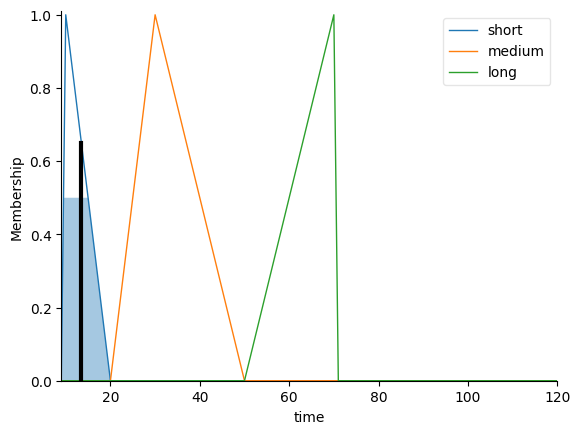

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Đầu vào
weight = ctrl.Antecedent(np.arange(1,11,1),'weight')
dirtiness= ctrl.Antecedent(np.arange(0,101,1),'dirtiness')
material= ctrl.Antecedent(np.arange(0,101,1),'material')


# Đầu ra
time = ctrl.Consequent(np.arange(9,121,1),'time')

#Membership function

weight["light"] = fuzz.trimf(weight.universe, [1,1,3])
weight["medium"] = fuzz.trimf(weight.universe, [3,5,7])
weight["heavy"] = fuzz.trimf(weight.universe, [7,10,10])

dirtiness["small"] = fuzz.trimf(dirtiness.universe, [0,0,50])
dirtiness["meidum"] = fuzz.trimf(dirtiness.universe, [10,50,90])
dirtiness["large"] = fuzz.trimf(dirtiness.universe, [50,100,100])

material["silk"] = fuzz.trapmf(material.universe, [1,1,30,30])
material["cotton"] = fuzz.trapmf(material.universe, [30,30,70,70])
material["jean"] = fuzz.trapmf(material.universe, [70,70,100,100])

time["short"] = fuzz.trimf(time.universe, [10,10,20])
time["medium"] = fuzz.trimf(time.universe, [20,30,50])
time["long"] = fuzz.trimf(time.universe, [50,70,70])

#Rules

rule1 = ctrl.Rule(weight['light'] &dirtiness['small'] & material["silk"], time['short'])
rule2 = ctrl.Rule(weight['light'] &dirtiness['small'] & material["cotton"], time['short'])
rule3 = ctrl.Rule(weight['light'] &dirtiness['small'] & material["jean"], time['short'])

rule4 = ctrl.Rule(weight['light'] &dirtiness['meidum'] & material["silk"], time['short'])
rule5 = ctrl.Rule(weight['light'] &dirtiness['meidum'] & material["cotton"], time['short'])
rule6 = ctrl.Rule(weight['light'] &dirtiness['meidum'] & material["jean"], time['medium'])

rule7 = ctrl.Rule(weight['light'] &dirtiness['large'] & material["silk"], time['medium'])
rule8 = ctrl.Rule(weight['light'] &dirtiness['large'] & material["cotton"], time['medium'])
rule9 = ctrl.Rule(weight['light'] &dirtiness['large'] & material["jean"], time['long'])


rule10 = ctrl.Rule(weight['medium'] &dirtiness['small'] & material["silk"], time['short'])
rule11= ctrl.Rule(weight['medium'] &dirtiness['small'] & material["cotton"], time['short'])
rule12= ctrl.Rule(weight['medium'] &dirtiness['small'] & material["jean"], time['medium'])

rule13 = ctrl.Rule(weight['medium'] &dirtiness['meidum'] & material["silk"], time['short'])
rule14= ctrl.Rule(weight['medium'] &dirtiness['meidum'] & material["cotton"], time['medium'])
rule15= ctrl.Rule(weight['medium'] &dirtiness['meidum'] & material["jean"], time['medium'])

rule16= ctrl.Rule(weight['medium'] &dirtiness['large'] & material["silk"], time['long'])
rule17= ctrl.Rule(weight['medium'] &dirtiness['large'] & material["cotton"], time['long'])
rule18= ctrl.Rule(weight['medium'] &dirtiness['large'] & material["jean"], time['long'])


rule19= ctrl.Rule(weight['heavy'] &dirtiness['small'] & material["silk"], time['medium'])
rule20= ctrl.Rule(weight['heavy'] &dirtiness['small'] & material["cotton"], time['medium'])
rule21= ctrl.Rule(weight['heavy'] &dirtiness['small'] & material["jean"], time['medium'])

rule22= ctrl.Rule(weight['heavy'] &dirtiness['meidum'] & material["silk"], time['medium'])
rule23= ctrl.Rule(weight['heavy'] &dirtiness['meidum'] & material["cotton"], time['long'])
rule24= ctrl.Rule(weight['heavy'] &dirtiness['meidum'] & material["jean"], time['long'])

rule25= ctrl.Rule(weight['heavy'] &dirtiness['large'] & material["silk"], time['long'])
rule26= ctrl.Rule(weight['heavy'] &dirtiness['large'] & material["cotton"], time['long'])
rule27= ctrl.Rule(weight['heavy'] &dirtiness['large'] & material["jean"], time['long'])

#in ra

washing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,
                                  rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23
                                  ,rule24,rule25,rule26,rule27])

time_washing = ctrl.ControlSystemSimulation(washing_ctrl)

time_washing.input["weight"] = 4
time_washing.input["dirtiness"] = 30
time_washing.input["material"] = 25

time_washing.compute()

# In ra kết quả đầu ra
print("Thời gian giặt: ", time_washing.output['time'])


time.view(sim = time_washing)
